In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 주식 데이터

In [2]:
pola_stock = pd.read_csv('../data/get_stock.polaris.csv')

In [3]:
pola_stock = pola_stock.dropna(subset=['date'])

In [4]:
# 전일비 변환작업 및 null값 업데이트

for i in range(len(pola_stock)-1):    
    daily_change = pola_stock['end_price'].iloc[i] - pola_stock['end_price'].iloc[i+1]
    pola_stock['daily_change'].iloc[i] = daily_change

    if i == len(pola_stock)-1:
        pola_stock['daily_change'].iloc[len(pola_stock)] = int(pola_stock['daily_change'].iloc[len(pola_stock)])

## 토큰 데이터

In [5]:
pola_token_get = pd.read_json('../data/pola_token.json')

In [6]:
pola_token_get['data']

t    [1605711600000, 1605798000000, 1605884400000, ...
o    [30.01, 482.9, 595.6, 550, 475.2, 3600, 2960, ...
h    [670, 697.5, 648.1, 600.6, 5000, 3944, 4015, 3...
l    [30.01, 354.6, 527.2, 451.6, 475.2, 2220, 2099...
c    [481, 596, 569.8, 483.5, 3640, 2933, 2821, 801...
v    [97047175.524635668613744039, 684675710.297753...
Name: data, dtype: object

In [7]:
pola_token = pd.DataFrame()
pola_token['timestamp'] = pola_token_get['data'][0]
pola_token['open_price'] = pola_token_get['data'][1]
pola_token['high_price'] = pola_token_get['data'][2]
pola_token['low_price'] = pola_token_get['data'][3]
pola_token['close_price'] = pola_token_get['data'][4]
pola_token['trade_volume'] = pola_token_get['data'][5]

In [8]:
pola_token

,timestamp,open_price,high_price,low_price,close_price,trade_volume
0,1605711600000,30.01,670,30.01,481,97047175.524635668613744039
1,1605798000000,482.9,697.5,354.6,596,684675710.297753710545601948
2,1605884400000,595.6,648.1,527.2,569.8,959839313.520329676084903356
3,1605970800000,550,600.6,451.6,483.5,9698525.496211397492328175
4,1606057200000,475.2,5000,475.2,3640,67830701.70380660742383707
...,...,...,...,...,...,...
1246,1713366000000,56.5,58,51.2,54.16,51958548.788103589176785507
1247,1713452400000,54.16,54.33,46,52.16,42951779.193584789613648723
1248,1713538800000,52.17,52.17,49.38,51.17,15439860.527550924633344107
1249,1713625200000,51.18,53.77,50.67,51.97,22002388.083048372683249285


In [9]:
import datetime

def change_datetime(text):

    # Epoch time을 기준으로 한 초 단위로 변환
    timestamp_s = text / 1000

    # 한국 시간대로 변환
    korea_time = datetime.datetime.utcfromtimestamp(timestamp_s) + datetime.timedelta(hours=9)

    korea_time = korea_time.strftime('%Y-%m-%d')

    return korea_time

In [10]:
pola_token['timestamp'] = pola_token['timestamp'].apply(change_datetime)

In [11]:
pola_token['timestamp'] = pd.to_datetime(pola_token['timestamp'])

In [12]:
pola_token

,timestamp,open_price,high_price,low_price,close_price,trade_volume
0,2020-11-19,30.01,670,30.01,481,97047175.524635668613744039
1,2020-11-20,482.9,697.5,354.6,596,684675710.297753710545601948
2,2020-11-21,595.6,648.1,527.2,569.8,959839313.520329676084903356
3,2020-11-22,550,600.6,451.6,483.5,9698525.496211397492328175
4,2020-11-23,475.2,5000,475.2,3640,67830701.70380660742383707
...,...,...,...,...,...,...
1246,2024-04-18,56.5,58,51.2,54.16,51958548.788103589176785507
1247,2024-04-19,54.16,54.33,46,52.16,42951779.193584789613648723
1248,2024-04-20,52.17,52.17,49.38,51.17,15439860.527550924633344107
1249,2024-04-21,51.18,53.77,50.67,51.97,22002388.083048372683249285


In [13]:
pola_token['close_price'] = pola_token['close_price'].apply(float)

In [14]:
pola_stock = pola_stock.drop(columns='_id')
pola_stock['date'] = pd.to_datetime(pola_stock['date'])


In [15]:
pola_stock = pola_stock.sort_values('date')

## 뉴스 데이터

In [16]:
office_news = pd.read_csv('../data/news_get.daum_office_news.csv')

In [17]:
share_news = pd.read_csv('../data/news_get.daum_news_share.csv')

In [18]:
len(share_news)

36

- share뉴스의 갯수가 36개 밖에 안되기 때문에 뉴스를 통합하고 중복 뉴스 제거"

In [19]:
news_total = pd.concat([office_news,share_news])

In [20]:
news_total = news_total.drop(columns='_id').drop_duplicates().sort_values('news_date')

In [21]:
news_total = news_total.drop(columns='news_brand').query('news_date.notna()')

In [22]:
news_total['news_date'] = pd.to_datetime(news_total['news_date'].str.split().str[:3].str.join(' '), format="%Y. %m. %d.")

In [23]:
news_total.shape

(800, 3)

- 총 800개의 뉴스 데이터를 수집

## 시각화
- 뉴스 데이터가 2022-01-01부터 수집되었으므로 토큰과 주식의 그 전데이터는 삭제해준다.

In [24]:
pola_stock = pola_stock.query('date > "2021-12-31"')
pola_token = pola_token.query('timestamp > "2021-12-31"')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

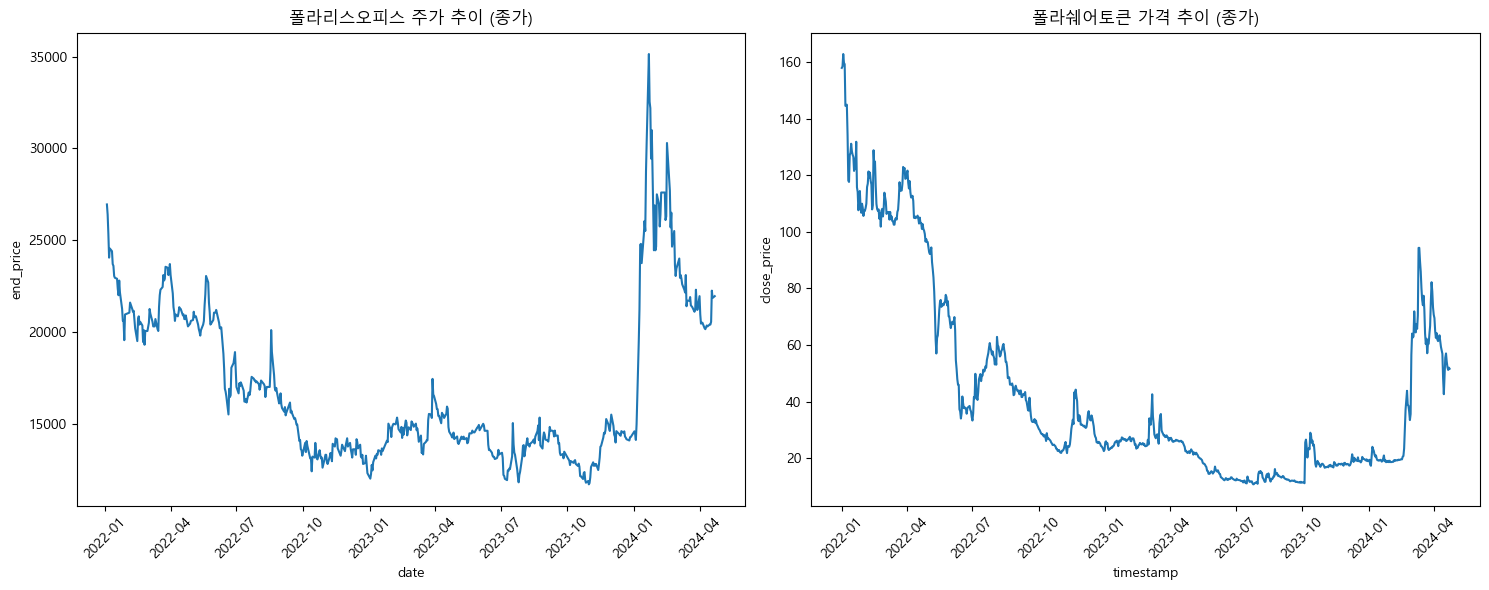

In [26]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=pola_stock, x='date', y='end_price')
plt.xticks(rotation = 45)
plt.title('폴라리스오피스 주가 추이 (종가)')

plt.subplot(1, 2, 2)
sns.lineplot(data=pola_token, x='timestamp', y='close_price')
plt.xticks(rotation = 45)
plt.title('폴라쉐어토큰 가격 추이 (종가)')

plt.tight_layout()

plt.show()

### 토큰 전일비 고가 추출

In [27]:
pola_token['daily_change'] = pola_token['close_price'] - pola_token['open_price'].apply(float)

In [32]:
pola_token['check_point'] = (pola_token['daily_change'] / pola_token['close_price']) > 0.1
pola_token['check_point_rate'] = (pola_token['daily_change'] / pola_token['close_price'])

In [33]:
df_check = pola_token.query('check_point == True')

- 일일 10%이상 급등한 날 추출

In [31]:
check_date_list = df_check['timestamp']

In [38]:
check_date_list

452    2022-02-14
575    2022-06-17
591    2022-07-03
593    2022-07-05
623    2022-08-04
721    2022-11-10
730    2022-11-19
773    2023-01-01
834    2023-03-03
837    2023-03-06
838    2023-03-07
848    2023-03-17
925    2023-06-02
970    2023-07-17
985    2023-08-01
996    2023-08-12
1008   2023-08-24
1050   2023-10-05
1054   2023-10-09
1057   2023-10-12
1090   2023-11-14
1142   2024-01-05
1143   2024-01-06
1187   2024-02-19
1188   2024-02-20
1189   2024-02-21
1197   2024-02-29
1198   2024-03-01
1201   2024-03-04
1207   2024-03-10
1224   2024-03-27
1243   2024-04-15
1244   2024-04-16
Name: timestamp, dtype: datetime64[ns]

In [42]:
df_check_date_count = pd.DataFrame()

for i in check_date_list:
    df_check_date_count = pd.concat([df_check_date_count,news_total.query(f'news_date == "{i}"')])

In [53]:
df_check_date_count['news_date'].value_counts().index

DatetimeIndex(['2024-02-29', '2024-03-04', '2023-08-24', '2024-04-15',
               '2024-01-05', '2023-10-05', '2024-03-27', '2024-02-20',
               '2023-03-07', '2022-06-17', '2023-03-17', '2024-01-06'],
              dtype='datetime64[ns]', name='news_date', freq=None)

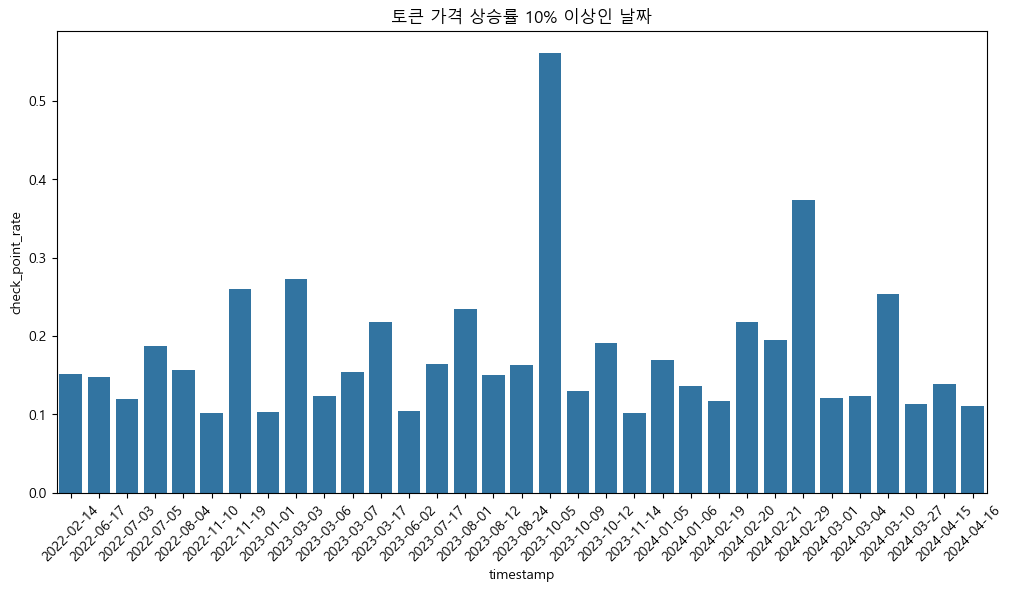

In [81]:
plt.figure(figsize=(12, 6))


sns.barplot(data=df_check, x='timestamp', y='check_point_rate')


plt.xticks(rotation = 45)
plt.title('토큰 가격 상승률 10% 이상인 날짜')

plt.show()

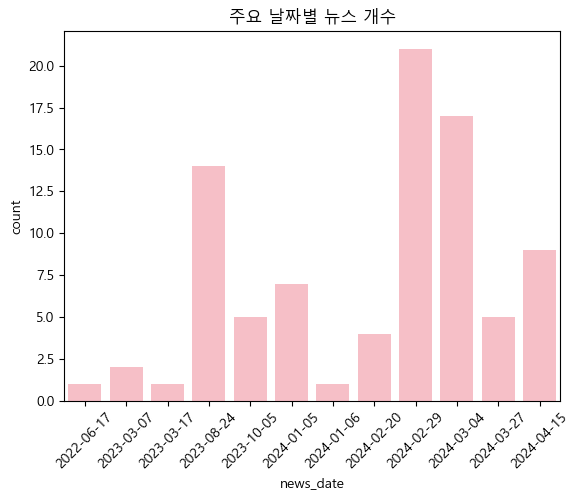

In [102]:
sns.countplot(data=df_check_date_count,x='news_date',color='lightpink')
plt.xticks(rotation = 45)
plt.title('주요 날짜별 뉴스 개수')

plt.show()


### 뉴스 LDA 분석

In [105]:
# 영어, 한글만 선택
import re

def replace_text(text):
    text = text.replace('\\n',' ')
    text = re.sub(r'[^a-zA-Z가-힣\s]',' ',text)
    return text 

In [106]:
df_check_date_count['newText'] = df_check_date_count['news_title'] + ' ' + df_check_date_count['news_contents']
df_check_date_count['newText'] = df_check_date_count['newText'].apply(replace_text)

### 토큰, 벡터라이징

In [107]:
from konlpy.tag import Okt
stopword = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','의','가','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

import numpy as np


# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopword):

  get_list = []

  for word, tag in okt.pos(raw,norm=True,stem=True):
    if len(word) <= 1:
      word = '공란'

    if tag in pos and word not in stopword:
      get_list.append(word)
    else:
      get_list.append('공란')
    pass


  return get_list

ModuleNotFoundError: No module named 'jpype'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)

In [104]:
df_check_date_count

,news_title,news_date,news_contents
100,노트북에서 눈 떼면 파란 제주 바다 '워케이션' 성지 될 세화리 '질그랭이',2022-06-17,마을 주민 주도로 운영하는 공간\n스타트업 연결돼 3억원 수익 기대 제주시 구좌읍 ...
227,"거래소, 폴라리스오피스에 현저한 시황변동 관련 조회공시 요구",2023-03-07,[이데일리 이용성 기자] 한국거래소 코스닥시장본부는 폴라리스오피스(041020)에 ...
228,7일 장 마감 후 주요 종목 뉴스,2023-03-07,[이데일리 양지윤 기자] 다음은 7일 장 마감 후 주요 종목뉴스다.\n△DB하이텍(...
237,"[특징주] 폴라리스오피스, MS '사무용 소프트웨어' 생성 AI 탑재에 강세",2023-03-17,마이크로소프트(MS)가 생성형 인공지능(AI) 기술 적용을 사무용 소프트웨어 오피스...
403,"KB證 ""폴라리스오피스, AI 오피스 출시 주목""",2023-08-24,[서울=뉴시스] 김경택 기자 = KB증권은 24일 폴라리스오피스에 대해 인공지능(A...
...,...,...,...
833,"폴라리스오피스, 과기부 국책과제 공동연구개발기관 선정",2024-04-15,[이데일리 이정현 기자] 폴라리스오피스(041020)는 과학기술정보통신부의 신규 국...
834,"이노그리드, 50억 규모 AI 서비스형플랫폼 개발 총괄 맡아",2024-04-15,[이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫...
835,"이노그리드, 50억 규모 'AI 서비스형플랫폼' 개발 과제 수주",2024-04-15,"주관사업자로 '기술 개발→플랫폼 구축→산업 실증' 전 과정 주도\n""AI에 최적화된..."
836,"이노그리드, AI 최적화된 PaaS 기술 개발 과제 수주",2024-04-15,이노그리드 로고 이미지\n이노그리드가 과학기술정보통신부와 정보통신기획평가원(IITP...
